In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import numpy as np # linear algebra
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
DATASET_DIR = "/content/gdrive/My Drive/kaggle/CT"
os.listdir(DATASET_DIR)

['CT_NonCOVID', 'CT_COVID']

In [0]:
##데이터 불러오기
COVID_data = os.listdir("/content/gdrive/My Drive/kaggle/CT/CT_COVID")
print(COVID_data[:10]) #the output we get are the .png files

NONCOVID_data = os.listdir("/content/gdrive/My Drive/kaggle/CT/CT_NonCOVID")
print('\n')
print(NONCOVID_data[:10])

['2020.03.01.20029769-p21-73_1%1.png', '2020.03.12.20034686-p17-91-5.png', 'Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png', '2020.03.07.20031393-p7-50%2.png', '2020.02.25.20021568-p24-111%8.png', '2020.03.12.20034686-p17-91-4.png', '2020.02.22.20024927-p19-68%2.png', '2020.03.21.20040691-p18-6-6.png', '2020.03.09.20033118-p20-93%0.png', '2020.02.25.20021568-p24-111%9.png']


['0.jpg', '1%2.jpg', '104.png', '102.png', '10%2.jpg', '1047.png', '10%1.jpg', '1030.png', '1029.png', '1046.png']


In [0]:
##이미지 데이터의 width와 height의 최소 픽셀사이즈를 구한다.
minh, minv = 100000,100000
for p in COVID_data:
    pic = Image.open('/content/gdrive/My Drive/kaggle/CT/CT_COVID'+"/"+p)
    if pic.size[0] < minh:
        minh = pic.size[0]
    if pic.size[1] < minv:
        minv = pic.size[1]
for u in NONCOVID_data:
    pic = Image.open('/content/gdrive/My Drive/kaggle/CT/CT_NonCOVID'+"/"+u)
    if pic.size[0] < minh:
        minh = pic.size[0]
    if pic.size[1] < minv:
        minv = pic.size[1]
print(minh)
print(minv)

115
61


# COVID/NONCOVID 이미지 시각화

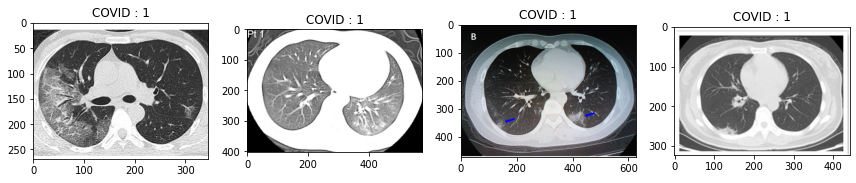

In [0]:
# Plot COVID IMAGE
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/gdrive/My Drive/kaggle/CT/CT_COVID' + "/" + COVID_data[i])
    plt.imshow(img)
    plt.title('COVID : 1')
    plt.tight_layout()
plt.show()

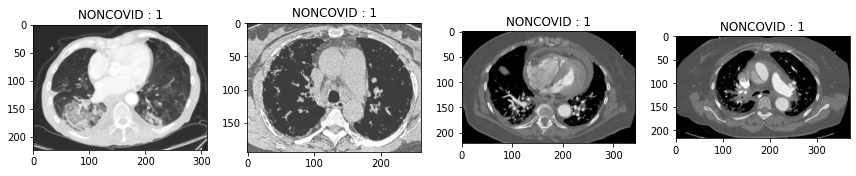

In [0]:
# Plot NONCOVID IMAGE
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/gdrive/My Drive/kaggle/CT/CT_NonCOVID' + "/" + NONCOVID_data[i])
    plt.imshow(img)
    plt.title('NONCOVID : 1')
    plt.tight_layout()
plt.show()

# IMAGE HISTOGRAM
이미지 히스토그램은 디지털 이미지의 색조 분포를 그래픽으로 나타내는 히스토그램 각 색조 값의 픽셀 수를 표시한다.
특정 이미지에 대한 히스토그램을 보면 전체 색조 분포를 한 눈에 판단 할 수 있음

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_img_hist(item_dir, num_img=6):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
  
  #plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    fig1 = plt.figure(idx,figsize=(10, 10))
    fig1.add_subplot(2, 2, 1)
    img = cv2.imread(img_path, )
    plt.imshow(img)
    fig1.add_subplot(2, 2, 2)
    plt.hist(img.ravel(),bins=256, fc='k', ec='k')
  
  plt.tight_layout()

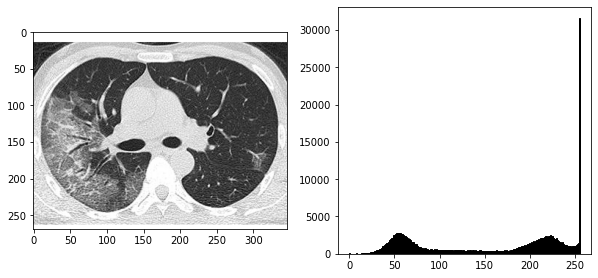

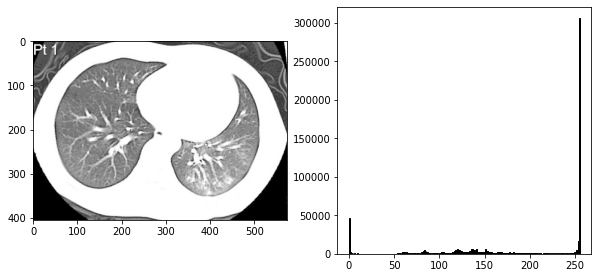

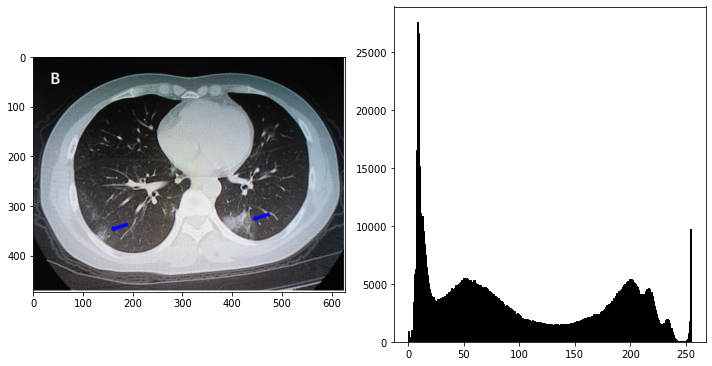

In [0]:
## COVID IMGE HISTOGRAM
C=os.path.join("/content/gdrive/My Drive/kaggle/CT/","CT_COVID/")
plot_img_hist(C,3)

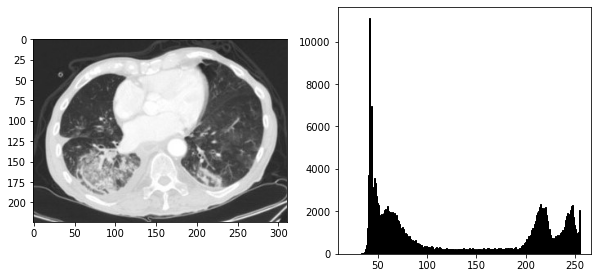

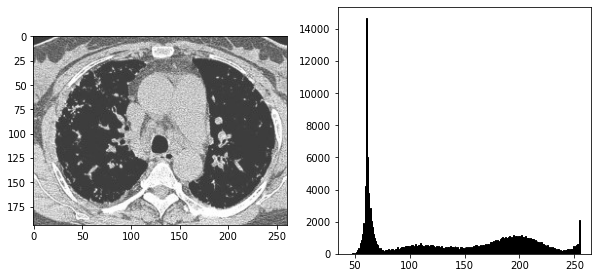

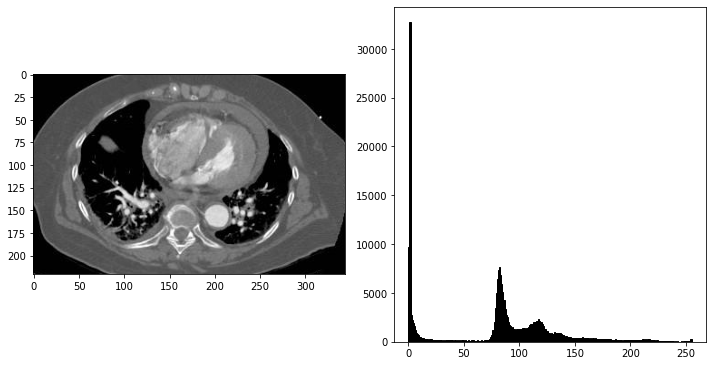

In [0]:
## NONCOVID IMGE HISTOGRAM
NC=os.path.join("/content/gdrive/My Drive/kaggle/CT/","CT_NonCOVID/")
plot_img_hist(NC,3)

sample COVID image의 Histogram을 보면 대부분 Left-skewed histograms의 형태를 보여준다 

sample NONCOVID image의 Histogram을 보면 대부분 Right-skewed histograms의 형태를 보여준다